# The Boston Housing Dataset

O Boston Housing Dataset é derivado de informações coletadas pelo Serviço de Censo dos EUA sobre moradias na área de [Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). O seguinte descreve as colunas do conjunto de dados:

1) CRIM: taxa de criminalidade per capita
2) ZN: proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés quadrados.
3) INDUS: proporção de hectares comerciais não varejistas por cidade
4) CHAS: variável do Rio Charles (= 1 se o rio passa na região; 0 caso contrário)
5) NOX: concentração de óxidos nítricos (partes por 10 milhões)
6) RM: número médio de quartos por alojamento
7) AGE: proporção de unidades ocupadas pelos proprietários construídas antes de 1940
8) DIS: distâncias ponderadas para cinco centros de emprego de Boston
9) RAD: índice de acessibilidade às rodovias radiais
10) TAX: taxa de imposto sobre a propriedade de valor total por US$ 10.000
11) PTRATIO: proporção aluno/professor
12) B: 1000(Bk−0,63)^2 onde Bk é a proporção de negros na cidade 13.
13) LSTAT: % da população considerada de classe baixa (considera escolaridade e também ocupação em trabalhos braçais)
14) MEDV: Valor médio das casas ocupadas pelos proprietários em US$ 1.000

O objetivo será prever a coluna MEDV

In [1]:
import pandas as pd

df = pd.read_csv('datasets/housing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [2]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Em uma primeira análise, as colunas ZN(% de terrenos maiores que 25 mil pés quadradrados) e CHAS (indica a presença do rio), possuem valores zerados para os 0.25 e 0.5 percentis.

Another interesing fact on the dataset is the max value of MEDV. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.

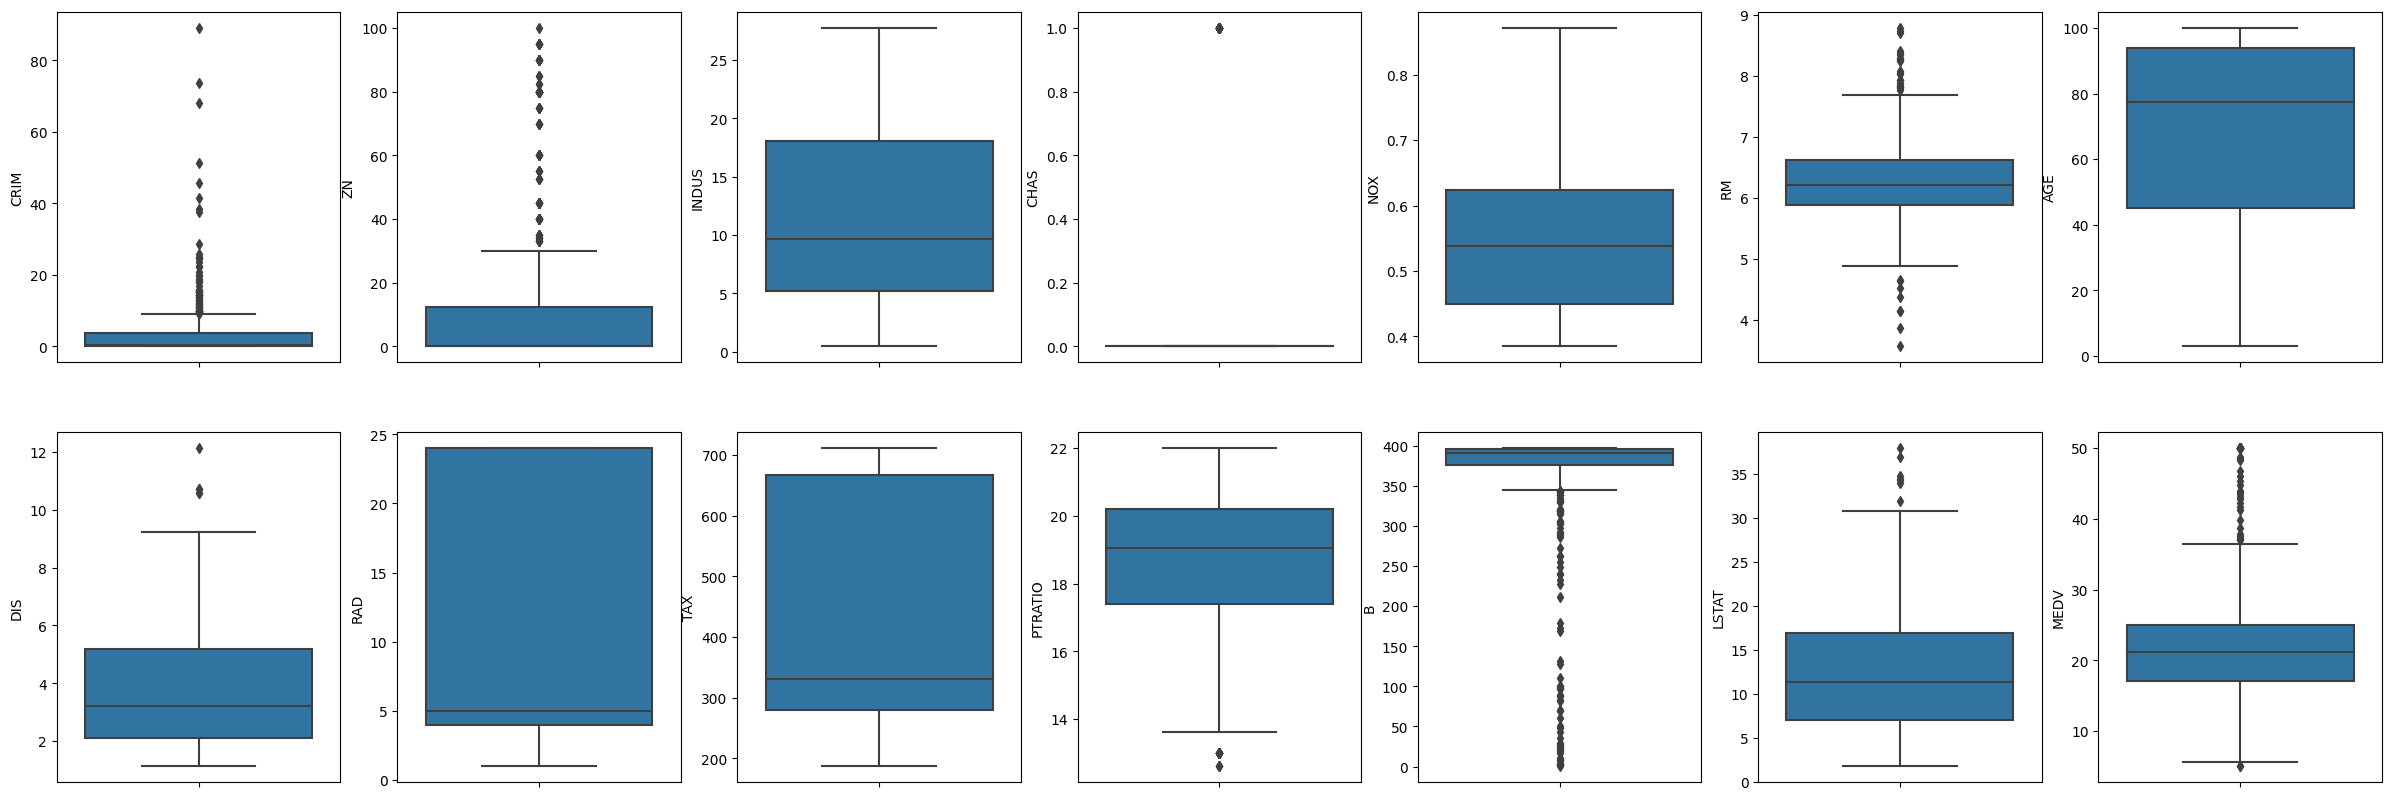

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(30, 10))
index = 0
axs = axs.flatten()
for column in df.columns:
    sns.boxplot(y=df[column], ax=axs[index])
    index += 1

In [4]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    
    outliers = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]

    perc = 100 * len(outliers) / len(v)
    print(f'{k:7} {perc:6.2f}% de outliers')

CRIM     13.04% de outliers
ZN       13.44% de outliers
INDUS     0.00% de outliers
CHAS    100.00% de outliers
NOX       0.00% de outliers
RM        5.93% de outliers
AGE       0.00% de outliers
DIS       0.99% de outliers
RAD       0.00% de outliers
TAX       0.00% de outliers
PTRATIO   2.96% de outliers
B        15.22% de outliers
LSTAT     1.38% de outliers
MEDV      7.91% de outliers


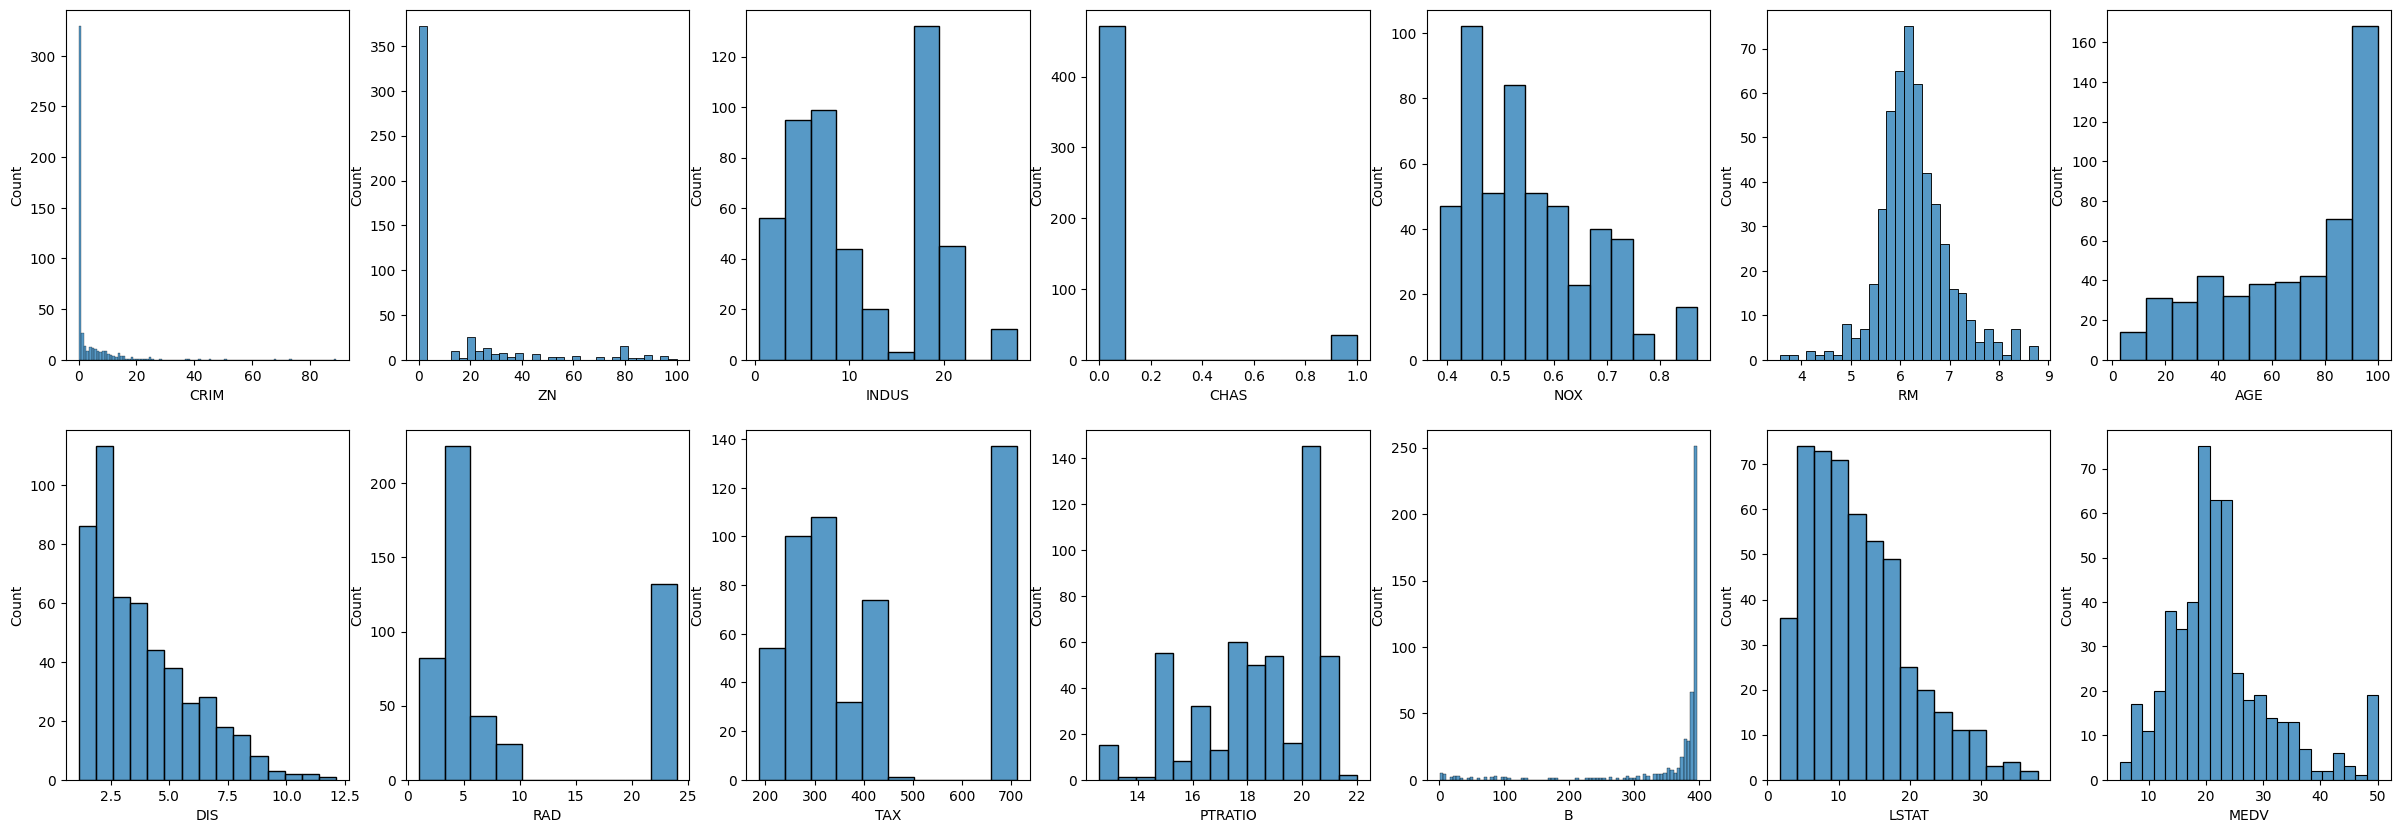

In [5]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(30, 10))
index = 0
axs = axs.flatten()

for k,v in df.items():
    sns.histplot(v, ax=axs[index])
    index += 1

In [6]:
len(df[df.MEDV == 50])

16

A coluna MEDV aparenta ter uma distribuição normal. No entanto, observa-se um pico no valor 50, que é o valor máximo para a coluna. A repetição desse valor em 16 registros, para uma coluna de valores contínuos, pode ser um indício de que essa coluna foi "aparada", com valores limitados a 50.

Isso é discutido na descrição original da base de dados. Por isso iremos remover esses registros com MEDV == 50

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

O mesmo pode estar acontecendo nas colunas RAD e TAX, mas como essas não são as variáveis dependentes do nosso estudo, vou optar por não remover

In [7]:
df = df[df.MEDV < 50]

Outro ponto que nota-se no histograma é que algumas features, como CRIM, ZN e B são altamente assimétricas, o que pode ser um problema para alguns algoritmos. Podemos medir a assimetria dos valores através da função skew, do pandas.

In [8]:
df.skew()

CRIM       5.163722
ZN         2.241578
INDUS      0.321800
CHAS       3.747718
NOX        0.753539
RM         0.174716
AGE       -0.587412
DIS        1.003954
RAD        1.014220
TAX        0.680625
PTRATIO   -0.823673
B         -2.832125
LSTAT      0.907299
MEDV       0.775660
dtype: float64

Vamos agora analisar a correlação par a par

<AxesSubplot:>

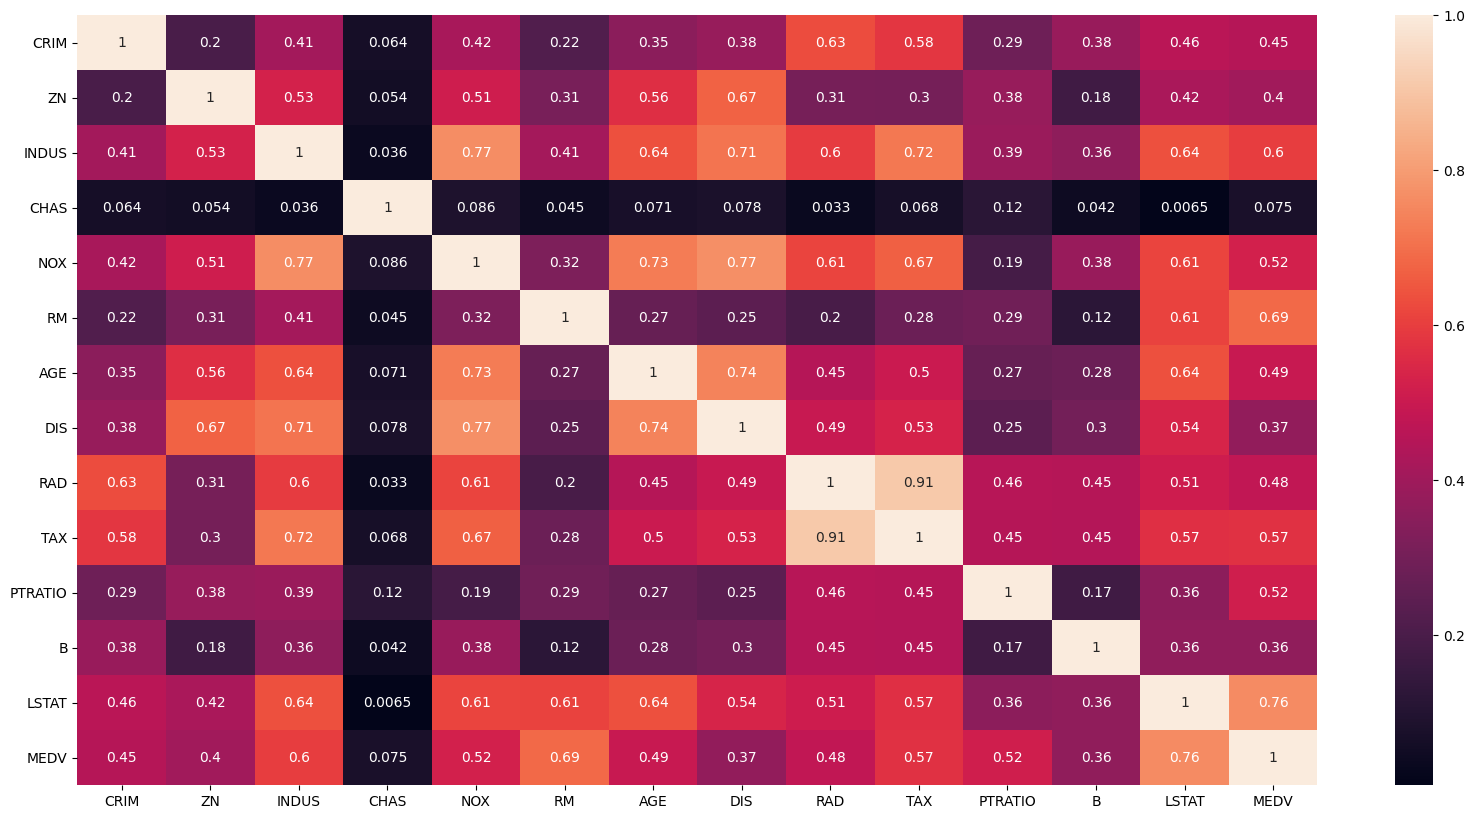

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot=True)

Pela matriz de correlação, nós vemos que as variáveis RAD e TAX possuem correlação muito alta. Isso indica que a quantidade de imposto que as propriedades pagam está altamente relacionado com o acesso que essas propriedades possuem às rodovias.


Mas vamos focar aqui na correlação das variáveis com MEDV, que é o que queremos prever.
Vemos que as colunas LSTAT, INDUS, RM, TAX, NOX, PTRAIO possuem uma correlação maior que 0.5 com MEDV, o que é um bom indicativo de que elas podem ser boas preditoras para nosso modelo. Vamos plotar a relação dessas variáveis com MEDV.

Vemos que a variável B, que tem um componente de raça que não é interessante ser usado, possui baixa correlação com MEDV.

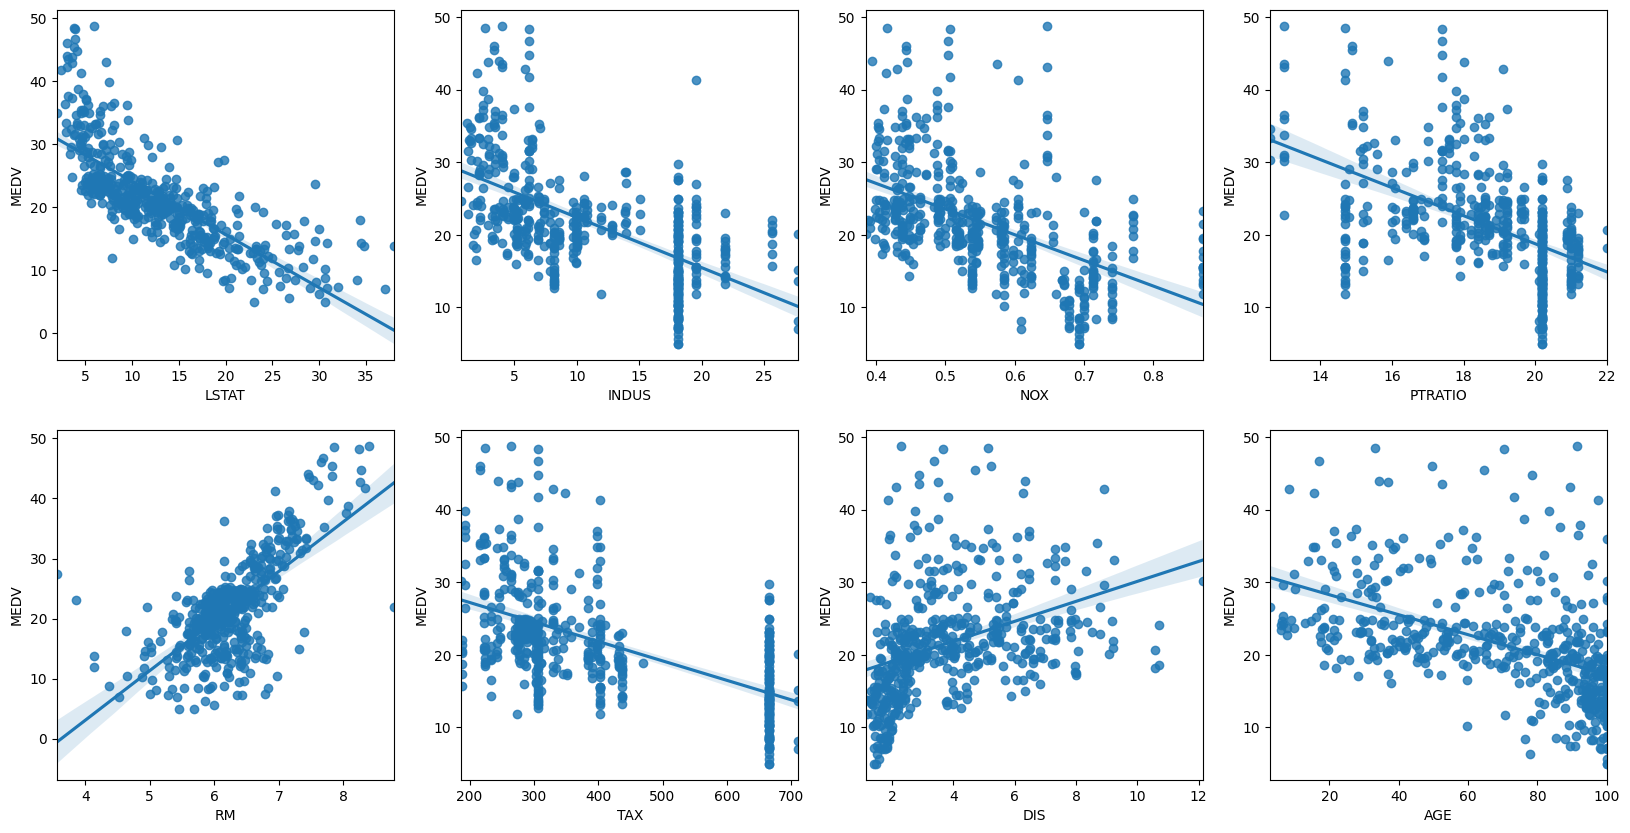

In [10]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

x = df.loc[:,column_sels]
y = df['MEDV']

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))

axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])

## Aplicação de Regressores

Vamos selecionar as features independentes com maior correlação com MEDV, e podemos selecioná-las em ordem de prioridade

In [11]:
x_columns = df.corr()['MEDV'].abs().sort_values(ascending=False).drop(index=['MEDV']).index
x_columns

Index(['LSTAT', 'RM', 'INDUS', 'TAX', 'NOX', 'PTRATIO', 'AGE', 'RAD', 'CRIM',
       'ZN', 'DIS', 'B', 'CHAS'],
      dtype='object')

In [12]:
x_columns[:8]

Index(['LSTAT', 'RM', 'INDUS', 'TAX', 'NOX', 'PTRATIO', 'AGE', 'RAD'], dtype='object')

11.864644606779219


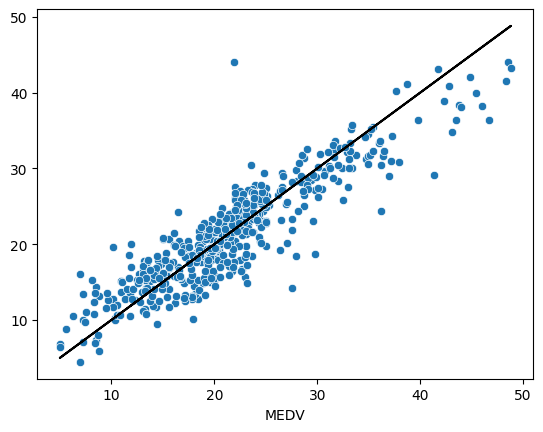

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

pipeline = Pipeline([
    ('minmax', MinMaxScaler()),
    ('create_metrics', PolynomialFeatures(degree=3)),
    ('classifier', Ridge())
])

predicted_values = cross_val_predict(
    estimator=pipeline,
    X=df[x_columns[:11]],
    y=df['MEDV'],
    cv=10
)

print(mean_squared_error(predicted_values, df['MEDV']))

sns.scatterplot(x=df['MEDV'], y=predicted_values)
plt.plot(df['MEDV'], df['MEDV'], color='black')

A regressão linear com regularização L2, chamada de Ridge, juntamente com a criação de features polinomiais, apresentou bons resultados.
Vamos tentar uma nova abordagem utilizando um algoritmo não linear.

In [14]:
from hyperopt import hp, fmin, space_eval
from sklearn.svm import SVR

def objective(params):

    pipeline = Pipeline([
        ('minmax', MinMaxScaler()),
        ('classifier', SVR(**params))
    ])

    predicted_values = cross_val_predict(
        estimator=pipeline,
        X=df[x_columns[:11]],
        y=df['MEDV'],
        cv=10
    )

    return mean_squared_error(predicted_values, df['MEDV'])

space = {
    'epsilon': hp.uniform('epsilon', 0.1, 0.5),
    'gamma': hp.uniform('gamma', 1e-5, 1e-1),
    'C': hp.choice('C', [1, 10, 100, 1000]),
}

best = fmin(objective, space, max_evals=200)

print(space_eval(space, best))

TPE is being used as the default algorithm.


100%|██████████| 200/200 [01:08<00:00,  2.91trial/s, best loss: 10.73496626551588] 
{'C': 1000, 'epsilon': 0.4809670580211962, 'gamma': 0.04599651773690343}


10.721243424828327


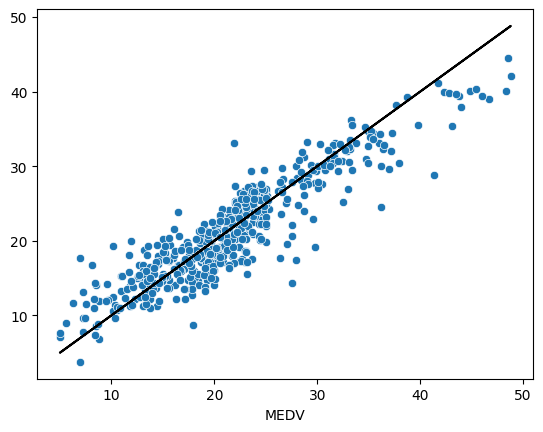

In [15]:
pipeline = Pipeline([
    ('minmax', MinMaxScaler()),
    ('classifier', SVR(C=1000, epsilon=0.49999145089577474, gamma=0.04980054501515546))
])

predicted_values = cross_val_predict(
    estimator=pipeline,
    X=df[x_columns[:11]],
    y=df['MEDV'],
    cv=10
)

print(mean_squared_error(predicted_values, df['MEDV']))

sns.scatterplot(x=df['MEDV'], y=predicted_values)
plt.plot(df['MEDV'], df['MEDV'], color='black')